In [1]:
import sys; sys.path.append('../..')
import random
import pyzx as zx
from pyzx.drawing import draw
from pyzx.extract import extract_architecture_aware_circuit
from pyzx.routing.architecture import create_line_architecture, create_circle_architecture, create_square_architecture

In [2]:
import logging

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [3]:
random.seed(1349)
g = zx.generate.cliffordT(qubits=5, depth=50, p_t=0.3, p_cnot=0.5)
# c = zx.generate.phase_poly(n_qubits=16, n_phase_layers=20, cnots_per_layer=10)
c = zx.Circuit.from_graph(g)
c = zx.optimize.basic_optimization(c.split_phase_gates()).split_phase_gates()
print(c.stats())

draw(c.to_graph())

Circuit  on 5 qubits with 50 gates.
        7 is the T-count
        43 Cliffords among which
        26 2-qubit gates (26 CNOT, 0 other) and
        4 Hadamard gates.


In [4]:
g = c.to_graph()
g_tele = g.copy()
zx.simplify.full_reduce(g_tele)

draw(g_tele)

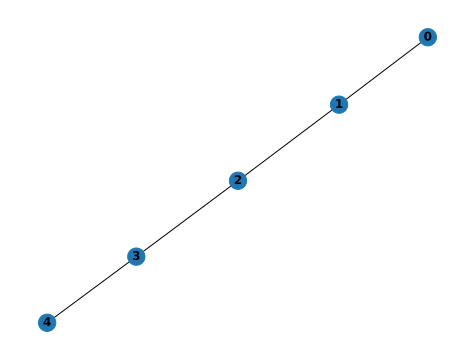

In [5]:
architecture = create_line_architecture(g_tele.qubit_count())
# architecture = create_circle_architecture(g_tele.qubit_count())
# architecture = create_square_architecture(g_tele.qubit_count())
architecture.visualize()

In [6]:
g_simp = g_tele.copy()
new_circuit = extract_architecture_aware_circuit(g=g_simp, architecture=architecture, up_to_perm=True, quiet=False)

Simple vertex
Vertices extracted: 1
Simple vertex
Vertices extracted: 2
Gaussian elimination with [CNOT(4,3), CNOT(3,4), CNOT(2,3), CNOT(1,2), CNOT(2,3), CNOT(3,4)] CNOTs
Vertices extracted: 1
Gaussian elimination with [CNOT(2,3), CNOT(4,3), CNOT(1,2), CNOT(3,4), CNOT(0,1), CNOT(2,1), CNOT(2,3), CNOT(4,3), CNOT(1,2), CNOT(3,2), CNOT(3,4), CNOT(2,3)] CNOTs
Vertices extracted: 1
Simple vertex
Vertices extracted: 1
Simple vertex
Vertices extracted: 1
Simple vertex
Vertices extracted: 1
Simple vertex
Vertices extracted: 1
Simple vertex
Vertices extracted: 3
Simple vertex
Vertices extracted: 2
Simple vertex
Vertices extracted: 1
CZ gates saved: 0


In [7]:
print(new_circuit.stats())

draw(new_circuit)

Circuit  on 5 qubits with 80 gates.
        7 is the T-count
        73 Cliffords among which
        44 2-qubit gates (18 CNOT, 26 other) and
        24 Hadamard gates.


In [8]:
new_graph = new_circuit.to_graph()
for edge in new_graph.edges():
    vertex0, vertex1 = edge
    qubit0 = new_graph.qubit(vertex0)
    qubit1 = new_graph.qubit(vertex1)
    if qubit0 != qubit1:
        if not architecture.graph.connected(qubit0, qubit1):
            print(f"Edge from {qubit0} to {qubit1} is not allowed in the architecture")

Edge from 4 to 2 is not allowed in the architecture
Edge from 2 to 0 is not allowed in the architecture
Edge from 3 to 0 is not allowed in the architecture
Edge from 2 to 0 is not allowed in the architecture
Edge from 3 to 1 is not allowed in the architecture
Edge from 3 to 0 is not allowed in the architecture
Edge from 3 to 1 is not allowed in the architecture
Edge from 2 to 0 is not allowed in the architecture
Edge from 4 to 2 is not allowed in the architecture
Edge from 4 to 0 is not allowed in the architecture
Edge from 4 to 2 is not allowed in the architecture
Edge from 4 to 1 is not allowed in the architecture
Edge from 4 to 1 is not allowed in the architecture
Edge from 2 to 0 is not allowed in the architecture
Edge from 4 to 1 is not allowed in the architecture
Edge from 3 to 1 is not allowed in the architecture
Edge from 2 to 0 is not allowed in the architecture
